In [30]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#load the dataset
(xtrain,ytrain), (xtest,ytest)=cifar10.load_data()
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.
xtrain=xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest=xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))

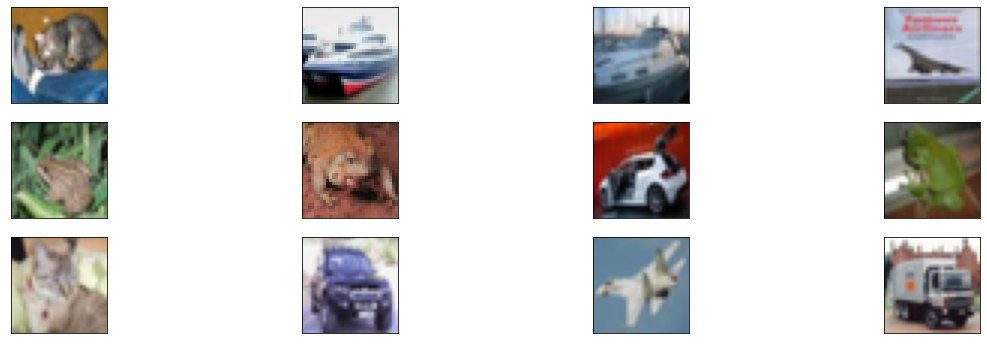

In [32]:
n = 12
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [33]:
print('xtrain shape is:',xtrain.shape)
print('xtest shape is:',xtest.shape)
#32 * 32 * 3 = 3072

xtrain shape is: (50000, 3072)
xtest shape is: (10000, 3072)


In [69]:
inputdim=32*32*3
latentdim=500

In [70]:
#Encoder
inputvec=Input(shape=(inputdim,))
enc1=Dense(2048) (inputvec)
act1=Activation('relu') (enc1)
enc2=Dense(1024) (act1)
bn1=BatchNormalization() (enc2)
act2=Activation('relu') (bn1)
d1=Dropout(0.2) (act2)

enc3=Dense(512) (d1)
act3=Activation('relu') (enc3)
enc4=Dense(256) (act3)
bn2=BatchNormalization() (enc4)
act4=Activation('relu') (bn2)
d2=Dropout(0.2) (act4)

enc5=Dense(128) (d2)
act5=Activation('relu') (enc5)
d3=Dropout(0.2) (act5)
enc6=Dense(latentdim) (d3)
bn3=BatchNormalization() (enc6)
encoder=Activation('relu') (bn3)

In [71]:
encode=Model(inputvec,encoder)

In [72]:
#Decoder
dec1=Dense(128) (encoder)
bn4=BatchNormalization() (dec1)
act6=Activation('relu') (bn4)

d4=Dropout(0.2) (act6)
dec2=Dense(256) (d4)
act7=Activation('relu') (dec2)
dec3=Dense(512) (act7)
bn5=BatchNormalization() (dec3)
act8=Activation('relu') (bn5)

d5=Dropout(0.2) (act8)
dec4=Dense(1024) (d5)
act9=Activation('relu') (dec4)
dec5=Dense(2048) (act9)
bn6=BatchNormalization() (dec5)
act10=Activation('relu') (bn6)
decoder=Dense(inputdim, activation='sigmoid') (act10)

In [73]:
autoencoder=Model(inputvec,decoder)
print(autoencoder.summary())

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_75 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
activation_69 (Activation)   (None, 2048)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_39 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_70 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0  

In [74]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)

In [75]:
autoencoder.compile(loss='binary_crossentropy',optimizer=opt)

In [76]:
hist=autoencoder.fit(xtrain,xtrain,epochs=200,batch_size=1000,shuffle=True, validation_data=(xtest,xtest))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 8s 153us/sample - loss: 0.7063 - val_loss: 0.6924
Epoch 2/200
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6725 - val_loss: 0.6915
Epoch 3/200
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6612 - val_loss: 0.6891
Epoch 4/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6545 - val_loss: 0.6888
Epoch 5/200
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6493 - val_loss: 0.6871
Epoch 6/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6461 - val_loss: 0.6849
Epoch 7/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6434 - val_loss: 0.6827
Epoch 8/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6408 - val_loss: 0.6808
Epoch 9/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6

Epoch 76/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6174 - val_loss: 0.6231
Epoch 77/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6174 - val_loss: 0.6253
Epoch 78/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6174 - val_loss: 0.6296
Epoch 79/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6176 - val_loss: 0.6230
Epoch 80/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6169 - val_loss: 0.6227
Epoch 81/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6170 - val_loss: 0.6222
Epoch 82/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6167 - val_loss: 0.6254
Epoch 83/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6170 - val_loss: 0.6207
Epoch 84/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6166 - val_loss: 0.6221
Epoch 85/200
50000/

50000/50000 [==============================] - 1s 21us/sample - loss: 0.6116 - val_loss: 0.6127
Epoch 151/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6116 - val_loss: 0.6104
Epoch 152/200
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6114 - val_loss: 0.6109
Epoch 153/200
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6117 - val_loss: 0.6112
Epoch 154/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6114 - val_loss: 0.6095
Epoch 155/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6112 - val_loss: 0.6106
Epoch 156/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6115 - val_loss: 0.6124
Epoch 157/200
50000/50000 [==============================] - 1s 21us/sample - loss: 0.6112 - val_loss: 0.6100
Epoch 158/200
50000/50000 [==============================] - 1s 20us/sample - loss: 0.6113 - val_loss: 0.6100
Epoch 159/200
50000/5000

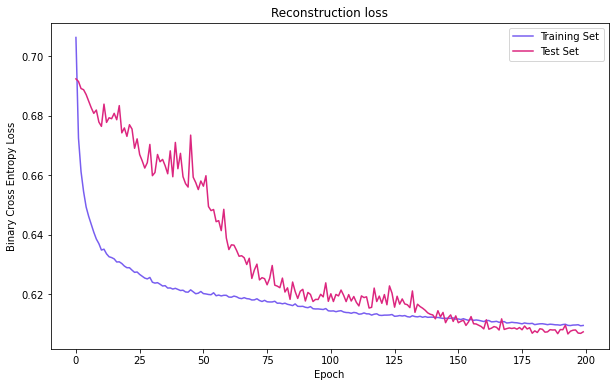

In [77]:
#Visualize loss
fig=plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],color='#785ef0')
plt.plot(hist.history['val_loss'],color='#dc267f')
plt.title('Reconstruction loss')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set','Test Set'],loc='upper right')
plt.show()

In [78]:
reconstructed=autoencoder.predict(xtest)

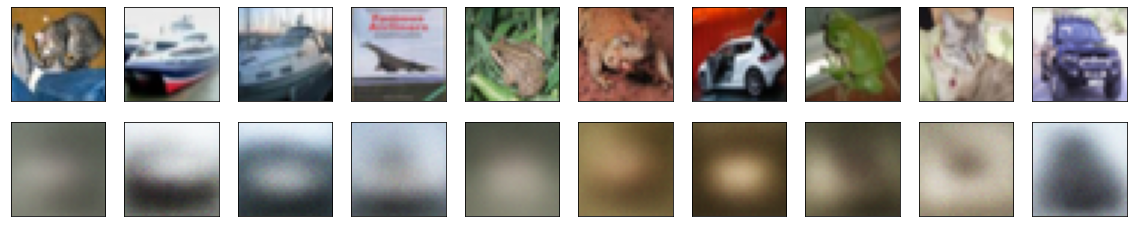

In [79]:
# Display Original and reconstructed images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(xtest[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(reconstructed[i].reshape(32, 32, 3))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()